# **Exploratory Data Analysis**

This notebook explore the data to be used in the project and performs any pre-processing necessary to build a machine learning model.

## **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Basic EDA**

Let's first look at some basic EDA to get a grasp of the data. Let's first load the data:

In [2]:
# Load the data
df = pd.read_csv('data/measures_v2.csv')
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [10]:
df

,u_q,u_d,i_q,i_d,motor_speed,torque,ambient,coolant,stator_yoke,stator_winding,stator_tooth,pm
0,-0.450682,-0.350055,0.000328,0.004419,0.002866,1.871008e-01,19.850691,18.805172,18.316547,19.086670,18.293219,24.554214
1,-0.325737,-0.305803,-0.000785,0.000606,0.000257,2.454175e-01,19.850672,18.818571,18.314955,19.092390,18.294807,24.538078
2,-0.440864,-0.372503,0.000386,0.001290,0.002355,1.766153e-01,19.850657,18.828770,18.326307,19.089380,18.294094,24.544693
3,-0.327026,-0.316199,0.002046,0.000026,0.006105,2.383027e-01,19.850647,18.835567,18.330833,19.083031,18.292542,24.554018
4,-0.471150,-0.332272,0.037184,-0.064317,0.003133,2.081967e-01,19.850639,18.857033,18.326662,19.082525,18.291428,24.565397
...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,0.791801,1.097528,-2.000169,0.000380,-8.116730e-60,23.989078,30.721298,38.653720,45.274497,41.934347,62.147780
1330812,-2.258684,0.778900,1.097569,-2.000499,0.002985,-5.815891e-60,23.970700,30.721306,38.656328,45.239017,41.868923,62.142646
1330813,-2.130312,0.804914,1.098765,-1.999268,0.002301,-4.167268e-60,23.977234,30.721312,38.650923,45.211576,41.804819,62.138387
1330814,-2.268498,0.763091,1.095696,-2.000999,0.005662,-2.985978e-60,24.001421,30.721316,38.655686,45.193508,41.762220,62.133422


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   u_d             1330816 non-null  float64
 2   i_q             1330816 non-null  float64
 3   i_d             1330816 non-null  float64
 4   motor_speed     1330816 non-null  float64
 5   torque          1330816 non-null  float64
 6   ambient         1330816 non-null  float64
 7   coolant         1330816 non-null  float64
 8   stator_yoke     1330816 non-null  float64
 9   stator_winding  1330816 non-null  float64
 10  stator_tooth    1330816 non-null  float64
 11  pm              1330816 non-null  float64
dtypes: float64(12)
memory usage: 121.8 MB


After loading the data we can drop any columns that are irrelevant to the study.

In [3]:
# Drop columns that are not needed from initial analysis
cols_to_drop = ['profile_id']
df = df.drop(cols_to_drop, axis=1)
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197


Let's reorder the columns to visually group features for visual fidelity.

In [4]:
# Reorder columns for ease of analysis
columns_order = ['u_q', 'u_d', 'i_q', 'i_d', 'motor_speed', 'torque', 'ambient', 'coolant', 'stator_yoke', 'stator_winding', 'stator_tooth', 'pm']
df = df[columns_order]
df.head()

,u_q,u_d,i_q,i_d,motor_speed,torque,ambient,coolant,stator_yoke,stator_winding,stator_tooth,pm
0,-0.450682,-0.350055,0.000328,0.004419,0.002866,0.187101,19.850691,18.805172,18.316547,19.086670,18.293219,24.554214
1,-0.325737,-0.305803,-0.000785,0.000606,0.000257,0.245417,19.850672,18.818571,18.314955,19.092390,18.294807,24.538078
2,-0.440864,-0.372503,0.000386,0.001290,0.002355,0.176615,19.850657,18.828770,18.326307,19.089380,18.294094,24.544693
3,-0.327026,-0.316199,0.002046,0.000026,0.006105,0.238303,19.850647,18.835567,18.330833,19.083031,18.292542,24.554018
4,-0.471150,-0.332272,0.037184,-0.064317,0.003133,0.208197,19.850639,18.857033,18.326662,19.082525,18.291428,24.565397


Next we can check if any of these columns have missing values.

In [5]:
# Check for missing values
df.isna().sum()

u_q               0
u_d               0
i_q               0
i_d               0
motor_speed       0
torque            0
ambient           0
coolant           0
stator_yoke       0
stator_winding    0
stator_tooth      0
pm                0
dtype: int64

Let's numerically explore the distribution of each column.

In [6]:
df.describe()

,u_q,u_d,i_q,i_d,motor_speed,torque,ambient,coolant,stator_yoke,stator_winding,stator_tooth,pm
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,-2.513381e+01,3.741278e+01,-6.871681e+01,2.202081e+03,3.110603e+01,2.456526e+01,3.622999e+01,4.818796e+01,6.634275e+01,5.687858e+01,5.850678e+01
std,4.417323e+01,6.309197e+01,9.218188e+01,6.493323e+01,1.859663e+03,7.713575e+01,1.929522e+00,2.178615e+01,1.999100e+01,2.867206e+01,2.295223e+01,1.900150e+01
min,-2.529093e+01,-1.315304e+02,-2.934268e+02,-2.780036e+02,-2.755491e+02,-2.464667e+02,8.783478e+00,1.062375e+01,1.807669e+01,1.858582e+01,1.813398e+01,2.085696e+01
25%,1.206992e+01,-7.869090e+01,1.095863e+00,-1.154061e+02,3.171107e+02,-1.374265e-01,2.318480e+01,1.869814e+01,3.199033e+01,4.278796e+01,3.841601e+01,4.315158e+01
50%,4.893818e+01,-7.429755e+00,1.577401e+01,-5.109376e+01,1.999977e+03,1.086035e+01,2.479733e+01,2.690014e+01,4.562551e+01,6.511013e+01,5.603635e+01,6.026629e+01
75%,9.003439e+01,1.470271e+00,1.006121e+02,-2.979688e+00,3.760639e+03,9.159718e+01,2.621702e+01,4.985749e+01,6.146083e+01,8.814114e+01,7.558668e+01,7.200837e+01
max,1.330370e+02,1.314698e+02,3.017079e+02,5.189670e-02,6.000015e+03,2.610057e+02,3.071420e+01,1.015985e+02,1.011480e+02,1.413629e+02,1.119464e+02,1.136066e+02


Each column seems to have a wide range of values that differ from one another. Let's investigate the ranges:

In [7]:
# Find range of values for each column
for col in df.columns:
    range = df[col].max() - df[col].min()
    print(f'{col}: {range:.2f}')

u_q: 158.33
u_d: 263.00
i_q: 595.13
i_d: 278.06
motor_speed: 6275.56
torque: 507.47
ambient: 21.93
coolant: 90.97
stator_yoke: 83.07
stator_winding: 122.78
stator_tooth: 93.81
pm: 92.75


We see that there is a large difference in ranges column to column. This means that we should **scale** our data such that features with large orders of magnitude do not overpower the lower magnitude features.

## **Feature Linear Correlation**

There are many components here that, from a physics standpoint, are likely to have a high degree of correlation. For example `current` and `voltage`, or `motor speed` and `torque` likely have a high degree of interaction with one another. Let's first see if there is in fact a high degree of correlation between any of the features.

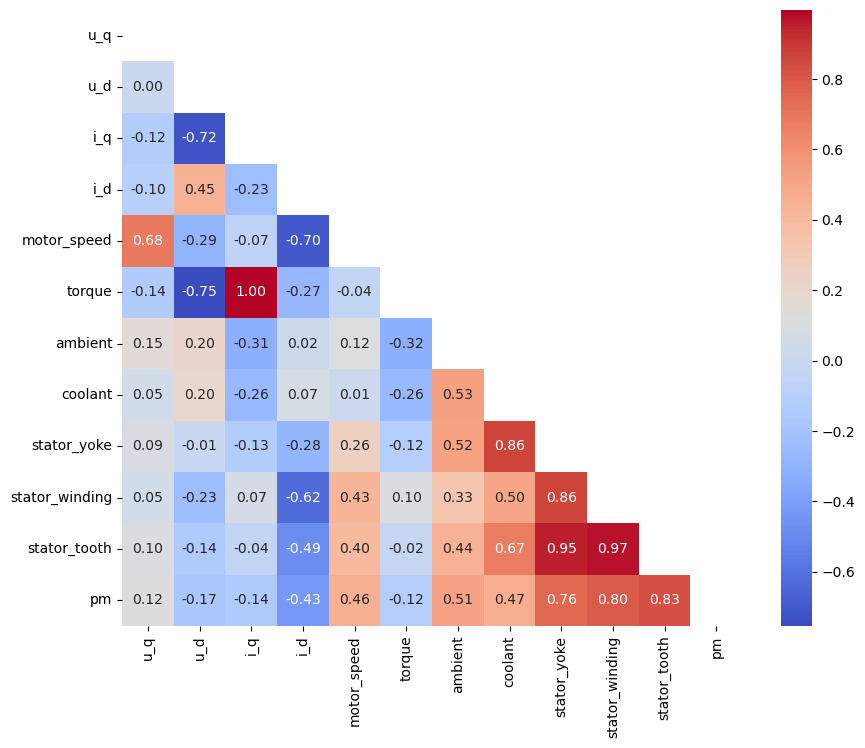

In [8]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
plt.show()

From the correlation plot above, we see that there is a high degree of correlation between the `q-component current` and `torque` which makes sense as the `q-component` is responsible for handling the output torque of the motor. There is also a high level of correlation between the `q-component voltage` and `motor speed`, which is to be expected as per the previous explanation. There is a strong **negative** correlation between the `d-component controls` and the `motor speed` and `torque` which is to be expected as the `d-component` is responsible for controlling the motor flux and field. And lastly, we see high degrees of correlation between all of the `temperature` features which makes sense as they are close in proximity and subject to heat transfer.

Surprisingly there is little correlation between `motor speed` and `torque` as initially thought. It is also interesting that there is low correlation between the `torque` and `temperature` features as high torques usually correspond to higher temperature values in most mechanical systems.

## **Feature Distributions**

Let's take a look at how the features are distributed to get a sense of their general shapes.

In [ ]:
sns.pairplot(df)

KeyboardInterrupt: 